#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aakas\AppData\Local\Temp\ipykernel_13864\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Reading Dataset

In [2]:
network = pd.read_csv("assignment5-dataset.csv")

In [5]:
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Checking and Replacing Missing Values

In [3]:
network.replace("?", np.nan, inplace=True)

In [4]:
network.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
network["Gender"].replace("Male", 0, inplace=True)
network["Gender"].replace("Female", 1, inplace=True)

C:\Users\aakas\AppData\Local\Temp\ipykernel_13864\632014200.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  network["Gender"].replace("Female", 1, inplace=True)


In [11]:
network.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


#### Finding Correlation between all Columns

In [13]:
correlation = network.corr()
correlation

,User ID,Gender,Age,EstimatedSalary,Purchased
User ID,1.000000,0.025249,-0.000721,0.071097,0.007120
Gender,0.025249,1.000000,0.073741,0.060435,0.042469
Age,-0.000721,0.073741,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.060435,0.155238,1.000000,0.362083
Purchased,0.007120,0.042469,0.622454,0.362083,1.000000


#### Plotting Heatmap

<Axes: >

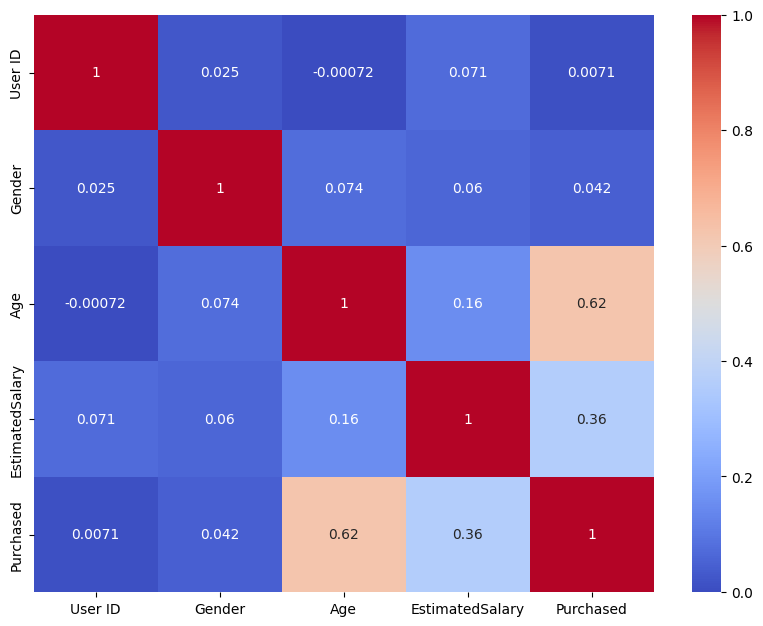

In [17]:
plt.figure(figsize=(10, 7.5))
sns.heatmap(correlation, annot=True, cmap="coolwarm")

#### Logistic Regression

In [21]:
x = network.iloc[:,1:-1]
y = network.iloc[:,-1]

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

#### Applying Scaling for better Accuracy

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
model = LogisticRegression(random_state=0)

In [45]:
model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [46]:
y_pred = model.predict(x_test)

#### Plotting Confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score

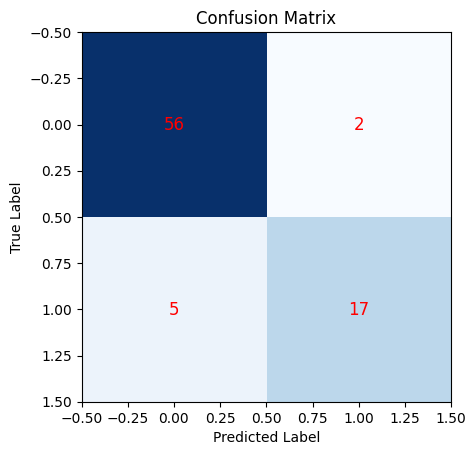

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation="nearest", cmap="Blues")

plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=14, color='red')

plt.show()

#### Calculating Accuracy

In [55]:
log_accuracy = accuracy_score(y_test, y_pred)
log_accuracy*100

91.25